In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
ENERGY_PATH = './energy_results/boolq_test_1k_average.csv'

energy_df = pd.read_csv(ENERGY_PATH)
energy_df.head()

,name,Avg. energy_CC(Wh),Total energy_CC(Wh)
0,flan-t5-base,0.011469,0.367
1,flan-t5-large,0.027906,0.893
2,flan-t5-xl,0.062844,2.011
3,single-scorer-strategy-1-0.6,0.017375,0.556
4,single-scorer-strategy-1-0.65,0.015176,0.516


In [9]:
# energy_df = energy_df.iloc[3:].reset_index(drop=True)
# energy_df.head()

,name,Avg. energy_CC(Wh),Total energy_CC(Wh)
0,single-scorer-strategy-1-0.6,0.017375,0.556
1,single-scorer-strategy-1-0.65,0.015176,0.516
2,single-scorer-strategy-1-0.7,0.015559,0.529
3,single-scorer-strategy-1-0.75,0.018056,0.650
4,single-scorer-strategy-1-0.8,0.022725,0.909


In [50]:
model_energy_dict = {}
threshold = []
for idx, row in energy_df.iterrows():
    if "flan" in row["name"]:
        model_energy_dict[row["name"]] = [row["Total energy_CC(Wh)"]]
    else:    
        model_name = '-'.join(row["name"].split('-')[:-1])
        th = row["name"].split('-')[-1]

        if model_name not in model_energy_dict:
            model_energy_dict[model_name] = []

        if float(th) not in threshold:
            threshold.append(float(th))
            
        model_energy_dict[model_name].append(row["Total energy_CC(Wh)"])

In [14]:
PERFORMANCE_DIR = './performance'
boolq_ss_st1_4 = pd.read_csv(os.path.join(PERFORMANCE_DIR, 'boolq_single_scorer_st1-4.csv'))
boolq_ss_st5_6 = pd.read_csv(os.path.join(PERFORMANCE_DIR, 'boolq_single_scorer_st5-6.csv'))

boolq_st1_4 = pd.read_csv(os.path.join(PERFORMANCE_DIR, 'boolq_st1-4.csv'))
boolq_st5_6 = pd.read_csv(os.path.join(PERFORMANCE_DIR, 'boolq_st5-6.csv'))

In [15]:
boolq_ss = pd.concat([boolq_ss_st1_4, boolq_ss_st5_6], ignore_index=True)
boolq = pd.concat([boolq_st1_4, boolq_st5_6], ignore_index=True)
boolq.head()

,Model,Threshold,M-Pre,M-Rec,M-F1
0,strategy-1,0.60,72.6,70.6,71.1
1,strategy-1,0.65,73.7,71.0,71.6
2,strategy-1,0.70,74.7,70.6,71.2
3,strategy-1,0.75,77.2,71.7,72.5
4,strategy-1,0.80,79.5,74.2,75.1


In [45]:
model_f1_dict = {}
threshold = []

for idx, row in boolq_ss.iterrows():
    model_name = "single-scorer-" + row["Model"]

    th = float(row["Threshold"])

    if model_name not in model_f1_dict:
        model_f1_dict[model_name] = []

    if float(th) not in threshold:
        threshold.append(float(th))
        
    model_f1_dict[model_name].append(row["M-F1"])

for idx, row in boolq.iterrows():
    model_name = row["Model"]

    th = float(row["Threshold"])

    if model_name not in model_f1_dict:
        model_f1_dict[model_name] = []

    if float(th) not in threshold:
        threshold.append(float(th))
        
    model_f1_dict[model_name].append(row["M-F1"])
    

In [46]:
benchmark = {"flan-t5-base": 70.6, "flan-t5-large": 82.9, "flan-t5-xl": 89.8}
for model, f1 in benchmark.items():
    model_f1_dict[model] = [f1] * len(threshold)

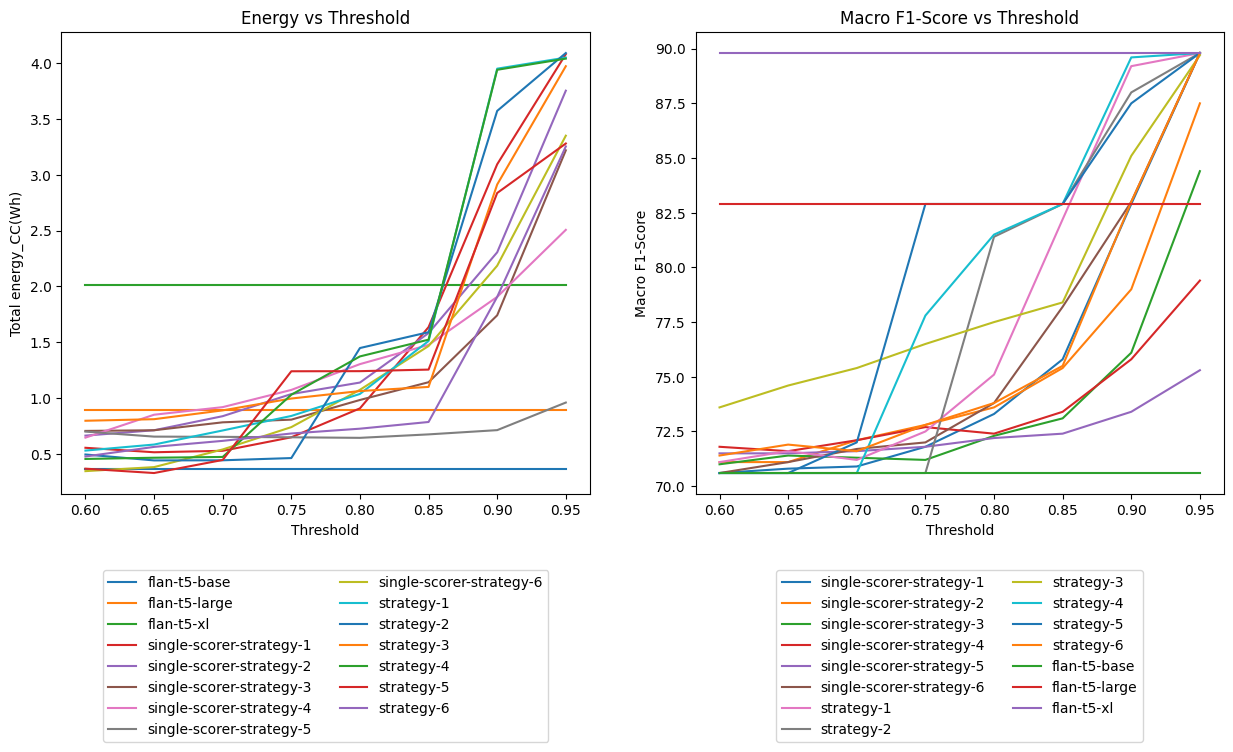

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_title('Energy vs Threshold')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Total energy_CC(Wh)')

for model, energy in model_energy_dict.items():
    if "flan" in model:
        energy = energy * len(threshold)
    ax1.plot(threshold, energy, label=model)

ax2.set_title('Macro F1-Score vs Threshold')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Macro F1-Score')

for model, f1 in model_f1_dict.items():
    ax2.plot(threshold, f1, label=model)


ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()